# 📚 Advanced Library Analytics – Database Schema Setup

This notebook defines all tables for the Library Management System aligned with the ERD, using `ipython-sql` and SQLite.


In [13]:
%load_ext sql
%sql sqlite:///library.db


The sql extension is already loaded. To reload it, use:
  %reload_ext sql


In [14]:
%%sql
DROP TABLE IF EXISTS Member;
CREATE TABLE Member (
    Member_ID INTEGER PRIMARY KEY,
    Name TEXT,
    Email TEXT,
    Phone TEXT,
    Member_Type TEXT
);


 * sqlite:///library.db
   sqlite:///test.db
Done.
Done.


[]

In [15]:
%%sql
DROP TABLE IF EXISTS Gold_Membership;
DROP TABLE IF EXISTS Silver_Membership;
DROP TABLE IF EXISTS Bronze_Membership;

CREATE TABLE Gold_Membership (
    Gold_Membership_ID INTEGER PRIMARY KEY,
    Discount_Rate REAL,
    Loyalty_POINTS INTEGER,
    Membership_status TEXT,
    Member_ID INTEGER,
    Membership_start_date DATE,
    G_mem_fee REAL,
    FOREIGN KEY (Member_ID) REFERENCES Member(Member_ID)
);

CREATE TABLE Silver_Membership (
    Silver_Membership_ID INTEGER PRIMARY KEY,
    Discount_Rate REAL,
    Loyalty_POINTS INTEGER,
    Membership_status TEXT,
    Member_ID INTEGER,
    Membership_start_date DATE,
    S_mem_fee REAL,
    FOREIGN KEY (Member_ID) REFERENCES Member(Member_ID)
);

CREATE TABLE Bronze_Membership (
    Bronze_Membership_ID INTEGER PRIMARY KEY,
    Discount_Rate REAL,
    Loyalty_POINTS INTEGER,
    Membership_status TEXT,
    Member_ID INTEGER,
    Membership_start_date DATE,
    B_mem_fee REAL,
    FOREIGN KEY (Member_ID) REFERENCES Member(Member_ID)
);


 * sqlite:///library.db
   sqlite:///test.db
Done.
Done.
Done.
Done.
Done.
Done.


[]

In [16]:
%%sql
DROP TABLE IF EXISTS Author;
CREATE TABLE Author (
    Author_ID INTEGER PRIMARY KEY,
    Name TEXT,
    Email TEXT,
    Phone TEXT
);


 * sqlite:///library.db
   sqlite:///test.db
Done.
Done.


[]

In [17]:
%%sql
DROP TABLE IF EXISTS Item_Donor;
CREATE TABLE Item_Donor (
    Donor_ID INTEGER PRIMARY KEY,
    Name TEXT,
    Email TEXT,
    Phone TEXT
);


 * sqlite:///library.db
   sqlite:///test.db
Done.
Done.


[]

In [18]:
%%sql
DROP TABLE IF EXISTS Item_Category;
CREATE TABLE Item_Category (
    Category_ID INTEGER PRIMARY KEY,
    Type_type TEXT,
    Name TEXT
);


 * sqlite:///library.db
   sqlite:///test.db
Done.
Done.


[]

In [19]:
%%sql
DROP TABLE IF EXISTS Item;
CREATE TABLE Item (
    Item_ID INTEGER PRIMARY KEY,
    Item_type TEXT,
    ISBN TEXT,
    Year INTEGER,
    Author_ID INTEGER,
    Category_ID INTEGER,
    Publisher_ID INTEGER,
    Pages INTEGER,
    Donor_ID INTEGER,
    FOREIGN KEY (Author_ID) REFERENCES Author(Author_ID),
    FOREIGN KEY (Category_ID) REFERENCES Item_Category(Category_ID),
    FOREIGN KEY (Donor_ID) REFERENCES Item_Donor(Donor_ID)
    -- Publisher table not shown in ERD; assumed handled separately
);


 * sqlite:///library.db
   sqlite:///test.db
Done.
Done.


[]

In [20]:
%%sql
DROP TABLE IF EXISTS Library;
CREATE TABLE Library (
    Library_ID INTEGER PRIMARY KEY,
    Library_Name TEXT,
    Address TEXT,
    Phone TEXT
);


 * sqlite:///library.db
   sqlite:///test.db
Done.
Done.


[]

In [21]:
%%sql
DROP TABLE IF EXISTS Item_Copy;
CREATE TABLE Item_Copy (
    Copy_ID INTEGER PRIMARY KEY,
    Item_ID INTEGER,
    Condition_Status TEXT,
    Copy_Number TEXT,
    Library_ID INTEGER,
    FOREIGN KEY (Item_ID) REFERENCES Item(Item_ID),
    FOREIGN KEY (Library_ID) REFERENCES Library(Library_ID)
);


 * sqlite:///library.db
   sqlite:///test.db
Done.
Done.


[]

In [22]:
%%sql
DROP TABLE IF EXISTS Loan;
CREATE TABLE Loan (
    Loan_ID INTEGER PRIMARY KEY,
    Item_ID INTEGER,
    Issue_Date DATE,
    Due_Date DATE,
    Return_Date DATE,
    Member_ID INTEGER,
    Status TEXT,
    Copy_ID INTEGER,
    FOREIGN KEY (Item_ID) REFERENCES Item(Item_ID),
    FOREIGN KEY (Member_ID) REFERENCES Member(Member_ID),
    FOREIGN KEY (Copy_ID) REFERENCES Item_Copy(Copy_ID)
);



 * sqlite:///library.db
   sqlite:///test.db
Done.
Done.


[]

In [23]:
%%sql
DROP TABLE IF EXISTS Penalty;
CREATE TABLE Penalty (
    Penalty_ID INTEGER PRIMARY KEY,
    Member_ID INTEGER,
    Loan_ID INTEGER,
    Amount REAL,
    Paid_Status TEXT,
    FOREIGN KEY (Member_ID) REFERENCES Member(Member_ID),
    FOREIGN KEY (Loan_ID) REFERENCES Loan(Loan_ID)
);


 * sqlite:///library.db
   sqlite:///test.db
Done.
Done.


[]

In [24]:
%%sql
DROP TABLE IF EXISTS Librarian;
CREATE TABLE Librarian (
    Librarian_ID INTEGER PRIMARY KEY,
    Name TEXT,
    Email TEXT,
    Phone TEXT,
    Library_ID INTEGER,
    FOREIGN KEY (Library_ID) REFERENCES Library(Library_ID)
);


 * sqlite:///library.db
   sqlite:///test.db
Done.
Done.


[]

In [25]:
%%sql
DROP TABLE IF EXISTS Events;
CREATE TABLE Events (
    Event_ID INTEGER PRIMARY KEY,
    Title TEXT,
    Description TEXT,
    Date DATE,
    Library_ID INTEGER,
    FOREIGN KEY (Library_ID) REFERENCES Library(Library_ID)
);


 * sqlite:///library.db
   sqlite:///test.db
Done.
Done.


[]

In [26]:
%%sql
DROP TABLE IF EXISTS Equipment;
CREATE TABLE Equipment (
    Equipment_ID INTEGER PRIMARY KEY,
    Name TEXT,
    Description TEXT,
    Library_ID INTEGER,
    FOREIGN KEY (Library_ID) REFERENCES Library(Library_ID)
);


 * sqlite:///library.db
   sqlite:///test.db
Done.
Done.


[]

In [32]:
%%sql
SELECT name FROM sqlite_master 
WHERE type='table' 
ORDER BY name;


 * sqlite:///library.db
   sqlite:///test.db
Done.


name
Author
Bronze_Membership
Equipment
Events
Gold_Membership
Item
Item_Category
Item_Copy
Item_Donor
Librarian


## 📊 Analytics Enhancement - Fact & Dimension Tables

Now let's add specialized analytics tables to support predictive modeling, member behavior tracking, and business intelligence.

In [33]:
%%sql
-- Create fact table for borrow events with member_id, item_id, borrow_date, return_date
DROP TABLE IF EXISTS Fact_Borrow_Events;
CREATE TABLE Fact_Borrow_Events (
    Event_ID INTEGER PRIMARY KEY,
    Member_ID INTEGER,
    Item_ID INTEGER,
    Copy_ID INTEGER,
    Library_ID INTEGER,
    Borrow_Date DATE,
    Due_Date DATE,
    Return_Date DATE,
    Days_Borrowed INTEGER,
    Is_Overdue BOOLEAN,
    Days_Overdue INTEGER,
    Penalty_Amount REAL,
    Member_Type TEXT,
    Item_Category TEXT,
    Season TEXT, -- Q1, Q2, Q3, Q4
    Day_of_Week TEXT,
    Is_Weekend BOOLEAN,
    FOREIGN KEY (Member_ID) REFERENCES Member(Member_ID),
    FOREIGN KEY (Item_ID) REFERENCES Item(Item_ID),
    FOREIGN KEY (Copy_ID) REFERENCES Item_Copy(Copy_ID),
    FOREIGN KEY (Library_ID) REFERENCES Library(Library_ID)
);

 * sqlite:///library.db
   sqlite:///test.db
Done.
Done.


[]

In [34]:
%%sql
-- Member Behavior Tracking for Advanced Analytics
DROP TABLE IF EXISTS Member_Behavior_Analytics;
CREATE TABLE Member_Behavior_Analytics (
    Analytics_ID INTEGER PRIMARY KEY,
    Member_ID INTEGER,
    Analysis_Date DATE,
    Total_Books_Borrowed INTEGER,
    Books_Returned_On_Time INTEGER,
    Books_Returned_Late INTEGER,
    Average_Days_To_Return REAL,
    Favorite_Genre TEXT,
    Reading_Frequency_Score REAL, -- Books per month
    Member_Lifecycle_Stage TEXT, -- New, Active, At_Risk, Churned
    Last_Borrow_Date DATE,
    Days_Since_Last_Borrow INTEGER,
    Total_Penalties REAL,
    Penalty_Payment_Rate REAL, -- % of penalties paid
    Preferred_Library_ID INTEGER,
    Risk_Score REAL, -- Churn prediction score (0-1)
    FOREIGN KEY (Member_ID) REFERENCES Member(Member_ID),
    FOREIGN KEY (Preferred_Library_ID) REFERENCES Library(Library_ID)
);

 * sqlite:///library.db
   sqlite:///test.db
Done.
Done.


[]

In [35]:
%%sql
-- Item Analytics for Demand Forecasting & Recommendation System
DROP TABLE IF EXISTS Item_Analytics;
CREATE TABLE Item_Analytics (
    Item_Analytics_ID INTEGER PRIMARY KEY,
    Item_ID INTEGER,
    Analysis_Date DATE,
    Total_Borrows INTEGER,
    Current_Availability INTEGER,
    Average_Loan_Duration REAL,
    Popularity_Score REAL, -- Borrows per month
    Demand_Score REAL, -- Waitlist/request frequency
    Genre_Popularity_Rank INTEGER,
    Author_Popularity_Rank INTEGER,
    Seasonal_Demand_Pattern TEXT, -- High_Summer, High_Winter, etc.
    Target_Audience TEXT, -- Students, Adults, Children
    Recommendation_Score REAL, -- For recommendation engine
    Last_Borrowed_Date DATE,
    Days_Since_Last_Borrowed INTEGER,
    FOREIGN KEY (Item_ID) REFERENCES Item(Item_ID)
);

 * sqlite:///library.db
   sqlite:///test.db
Done.
Done.


[]

In [36]:
%%sql
-- Audit Trail & Data Quality Framework
DROP TABLE IF EXISTS Audit_Trail;
CREATE TABLE Audit_Trail (
    Audit_ID INTEGER PRIMARY KEY,
    Table_Name TEXT,
    Record_ID INTEGER,
    Action_Type TEXT, -- INSERT, UPDATE, DELETE
    Field_Changed TEXT,
    Old_Value TEXT,
    New_Value TEXT,
    Changed_By TEXT, -- User/System
    Change_Timestamp DATETIME,
    Reason TEXT
);

-- External Data Integration Points
DROP TABLE IF EXISTS External_Events;
CREATE TABLE External_Events (
    Event_ID INTEGER PRIMARY KEY,
    Event_Date DATE,
    Event_Type TEXT, -- Holiday, Weather, Local_Event
    Event_Description TEXT,
    Impact_Score REAL, -- Expected impact on library usage
    Library_ID INTEGER,
    FOREIGN KEY (Library_ID) REFERENCES Library(Library_ID)
);

 * sqlite:///library.db
   sqlite:///test.db
Done.
Done.
Done.
Done.


[]

In [37]:
%%sql
-- Model Predictions Storage (for Phase 2 - Predictive Analytics)
DROP TABLE IF EXISTS Prediction_Results;
CREATE TABLE Prediction_Results (
    Prediction_ID INTEGER PRIMARY KEY,
    Model_Name TEXT,
    Model_Version TEXT,
    Prediction_Date DATETIME,
    Target_ID INTEGER, -- Member_ID or Item_ID depending on model
    Target_Type TEXT, -- Member, Item, Loan
    Prediction_Type TEXT, -- Churn, Overdue, Demand
    Predicted_Value REAL,
    Confidence_Score REAL,
    Actual_Value REAL, -- For model validation
    Is_Validated BOOLEAN
);

-- A/B Testing Framework (for Phase 7)
DROP TABLE IF EXISTS AB_Test_Results;
CREATE TABLE AB_Test_Results (
    Test_ID INTEGER PRIMARY KEY,
    Test_Name TEXT,
    Member_ID INTEGER,
    Test_Group TEXT, -- Control, Treatment_A, Treatment_B
    Start_Date DATE,
    End_Date DATE,
    Metric_Name TEXT,
    Metric_Value REAL,
    Statistical_Significance REAL,
    FOREIGN KEY (Member_ID) REFERENCES Member(Member_ID)
);

 * sqlite:///library.db
   sqlite:///test.db
Done.
Done.
Done.
Done.


[]

In [38]:
%%sql
-- Verify Complete Enhanced Schema
SELECT name FROM sqlite_master 
WHERE type='table' 
ORDER BY name;

 * sqlite:///library.db
   sqlite:///test.db
Done.


name
AB_Test_Results
Audit_Trail
Author
Bronze_Membership
Equipment
Events
External_Events
Fact_Borrow_Events
Gold_Membership
Item


# 🎯 Phase 2A: Smart Data Generation

## 📊 Realistic Synthetic Data with Behavioral Patterns

Creating comprehensive synthetic data that includes:
- **Member Personas**: Students, professionals, retirees, families
- **Seasonal Patterns**: Summer reading, exam periods, holiday trends
- **Regional Preferences**: Branch-specific reading habits
- **Behavioral Patterns**: Power users, casual readers, at-risk members

In [1]:
# Import libraries for smart data generation
import pandas as pd
import numpy as np
import random
from datetime import datetime, timedelta, date
import uuid
from faker import Faker
import matplotlib.pyplot as plt
import seaborn as sns

# Set random seeds for reproducibility
np.random.seed(42)
random.seed(42)

# Initialize Faker for realistic data
fake = Faker()
fake.seed_instance(42)

print("✅ Libraries imported successfully!")
print(f"📅 Data generation date: {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}")

✅ Libraries imported successfully!
📅 Data generation date: 2025-08-01 22:31:36


In [2]:
# Reconnect to database
%load_ext sql
%sql sqlite:///library.db

# Data generation parameters
DATA_CONFIG = {
    'libraries': 5,
    'members': 1000,
    'authors': 200,
    'books_per_author': 3,
    'copies_per_book': 4,
    'loans_per_month': 800,
    'simulation_months': 24,  # 2 years of data
    'start_date': datetime(2023, 1, 1)
}

print("🔌 Database connected!")
print("📊 Data Generation Configuration:")
for key, value in DATA_CONFIG.items():
    print(f"   {key}: {value}")

🔌 Database connected!
📊 Data Generation Configuration:
   libraries: 5
   members: 1000
   authors: 200
   books_per_author: 3
   copies_per_book: 4
   loans_per_month: 800
   simulation_months: 24
   start_date: 2023-01-01 00:00:00


In [3]:
# 🏢 Generate Libraries with Regional Characteristics
def generate_libraries():
    library_types = [
        ("Downtown Central Library", "123 Main St", "Urban", "Business"),
        ("University Branch", "456 College Ave", "Academic", "Student"),
        ("Suburban Family Library", "789 Oak St", "Suburban", "Family"),
        ("Senior Community Center", "321 Elm Dr", "Senior", "Elderly"),
        ("Children's Discovery Branch", "654 Park Blvd", "Family", "Children")
    ]
    
    libraries = []
    for i, (name, address, area_type, primary_audience) in enumerate(library_types, 1):
        libraries.append({
            'Library_ID': i,
            'Library_Name': name,
            'Address': address,
            'Phone': fake.phone_number(),
            'Area_Type': area_type,
            'Primary_Audience': primary_audience
        })
    
    return libraries

libraries_data = generate_libraries()
print(f"🏢 Generated {len(libraries_data)} libraries:")
for lib in libraries_data:
    print(f"   {lib['Library_Name']} - {lib['Primary_Audience']} focused")

🏢 Generated 5 libraries:
   Downtown Central Library - Business focused
   University Branch - Student focused
   Suburban Family Library - Family focused
   Senior Community Center - Elderly focused
   Children's Discovery Branch - Children focused


In [4]:
# 👥 Generate Members with Realistic Personas
def generate_member_personas():
    personas = {
        'Student': {
            'age_range': (18, 28),
            'reading_frequency': 'High',
            'preferred_genres': ['Academic', 'Science', 'Technology', 'Fiction'],
            'borrow_pattern': 'Seasonal_Heavy',  # Heavy during semester
            'late_return_rate': 0.25,  # Students often busy
            'percentage': 0.25
        },
        'Professional': {
            'age_range': (25, 55),
            'reading_frequency': 'Medium',
            'preferred_genres': ['Business', 'Self-Help', 'Biography', 'Fiction'],
            'borrow_pattern': 'Consistent',
            'late_return_rate': 0.15,
            'percentage': 0.35
        },
        'Retiree': {
            'age_range': (60, 85),
            'reading_frequency': 'High',
            'preferred_genres': ['History', 'Biography', 'Mystery', 'Garden'],
            'borrow_pattern': 'Consistent_High',
            'late_return_rate': 0.08,  # More time to read
            'percentage': 0.20
        },
        'Parent': {
            'age_range': (28, 50),
            'reading_frequency': 'Medium',
            'preferred_genres': ['Children', 'Parenting', 'Fiction', 'Cooking'],
            'borrow_pattern': 'Weekend_Heavy',
            'late_return_rate': 0.20,  # Busy with kids
            'percentage': 0.15
        },
        'Casual': {
            'age_range': (20, 70),
            'reading_frequency': 'Low',
            'preferred_genres': ['Fiction', 'Romance', 'Mystery', 'Travel'],
            'borrow_pattern': 'Irregular',
            'late_return_rate': 0.30,  # Less engaged
            'percentage': 0.05
        }
    }
    return personas

def generate_members(count, personas):
    members = []
    membership_types = ['Bronze', 'Silver', 'Gold']
    
    for i in range(1, count + 1):
        # Select persona based on percentages
        persona_choice = np.random.choice(
            list(personas.keys()),
            p=[personas[p]['percentage'] for p in personas.keys()]
        )
        persona = personas[persona_choice]
        
        # Generate member data
        age = np.random.randint(*persona['age_range'])
        member_type = np.random.choice(membership_types, p=[0.5, 0.3, 0.2])
        
        member = {
            'Member_ID': i,
            'Name': fake.name(),
            'Email': fake.email(),
            'Phone': fake.phone_number(),
            'Member_Type': member_type,
            'Age': age,
            'Persona': persona_choice,
            'Reading_Frequency': persona['reading_frequency'],
            'Preferred_Genres': persona['preferred_genres'],
            'Borrow_Pattern': persona['borrow_pattern'],
            'Late_Return_Rate': persona['late_return_rate'],
            'Registration_Date': fake.date_between(
                start_date=DATA_CONFIG['start_date'].date(),
                end_date=date.today()
            )
        }
        members.append(member)
    
    return members

# Generate the data
member_personas = generate_member_personas()
members_data = generate_members(DATA_CONFIG['members'], member_personas)

print(f"👥 Generated {len(members_data)} members with personas:")
persona_counts = {}
for member in members_data:
    persona = member['Persona']
    persona_counts[persona] = persona_counts.get(persona, 0) + 1

for persona, count in persona_counts.items():
    print(f"   {persona}: {count} members ({count/len(members_data)*100:.1f}%)")

👥 Generated 1000 members with personas:
   Professional: 362 members (36.2%)
   Retiree: 202 members (20.2%)
   Student: 237 members (23.7%)
   Casual: 60 members (6.0%)
   Parent: 139 members (13.9%)


In [5]:
# 📚 Generate Authors and Books with Genre Diversity
def generate_authors_and_books():
    # Define genre categories and their characteristics
    genres = {
        'Fiction': ['Contemporary', 'Historical', 'Literary', 'Thriller'],
        'Non-Fiction': ['Biography', 'History', 'Science', 'Self-Help'],
        'Academic': ['Textbook', 'Research', 'Reference'],
        'Children': ['Picture Book', 'Young Adult', 'Educational'],
        'Technical': ['Programming', 'Engineering', 'Mathematics'],
        'Arts': ['Art History', 'Music', 'Photography'],
        'Health': ['Medicine', 'Fitness', 'Nutrition'],
        'Business': ['Management', 'Finance', 'Marketing']
    }
    
    authors = []
    books = []
    categories = []
    donors = []
    
    # Generate categories first
    category_id = 1
    for main_genre, sub_genres in genres.items():
        for sub_genre in sub_genres:
            categories.append({
                'Category_ID': category_id,
                'Type_type': main_genre,
                'Name': sub_genre
            })
            category_id += 1
    
    # Generate some donors
    for i in range(1, 21):  # 20 donors
        donors.append({
            'Donor_ID': i,
            'Name': fake.company(),
            'Email': fake.company_email(),
            'Phone': fake.phone_number()
        })
    
    # Generate authors and their books
    book_id = 1
    for author_id in range(1, DATA_CONFIG['authors'] + 1):
        author = {
            'Author_ID': author_id,
            'Name': fake.name(),
            'Email': fake.email(),
            'Phone': fake.phone_number()
        }
        authors.append(author)
        
        # Each author writes books in 1-2 genres primarily
        author_genres = random.sample(list(genres.keys()), random.randint(1, 2))
        
        for book_num in range(DATA_CONFIG['books_per_author']):
            genre = random.choice(author_genres)
            sub_genre = random.choice(genres[genre])
            category = next(c for c in categories if c['Name'] == sub_genre)
            
            book = {
                'Item_ID': book_id,
                'Item_type': 'Book',
                'ISBN': fake.isbn13(),
                'Title': fake.catch_phrase(),
                'Year': random.randint(1990, 2024),
                'Author_ID': author_id,
                'Category_ID': category['Category_ID'],
                'Publisher_ID': random.randint(1, 50),  # Assume 50 publishers
                'Pages': random.randint(150, 800),
                'Donor_ID': random.choice([None] + [d['Donor_ID'] for d in donors[:10]])  # Some donated
            }
            books.append(book)
            book_id += 1
    
    return authors, books, categories, donors

# Generate the data
authors_data, books_data, categories_data, donors_data = generate_authors_and_books()

print(f"👨‍💼 Generated {len(authors_data)} authors")
print(f"📚 Generated {len(books_data)} books")
print(f"📂 Generated {len(categories_data)} categories")
print(f"🎁 Generated {len(donors_data)} donors")

# Show genre distribution
genre_counts = {}
for book in books_data:
    category = next(c for c in categories_data if c['Category_ID'] == book['Category_ID'])
    genre = category['Type_type']
    genre_counts[genre] = genre_counts.get(genre, 0) + 1

print("\n📊 Genre Distribution:")
for genre, count in genre_counts.items():
    print(f"   {genre}: {count} books ({count/len(books_data)*100:.1f}%)")

👨‍💼 Generated 200 authors
📚 Generated 600 books
📂 Generated 26 categories
🎁 Generated 20 donors

📊 Genre Distribution:
   Fiction: 70 books (11.7%)
   Business: 73 books (12.2%)
   Arts: 72 books (12.0%)
   Children: 63 books (10.5%)
   Technical: 95 books (15.8%)
   Health: 70 books (11.7%)
   Non-Fiction: 87 books (14.5%)
   Academic: 70 books (11.7%)


In [7]:
%%sql
-- Insert Libraries
DELETE FROM Library;
INSERT INTO Library (Library_ID, Library_Name, Address, Phone)
VALUES 
    (1, 'Downtown Central Library', '123 Main St', '555-0101'),
    (2, 'University Branch', '456 College Ave', '555-0102'),
    (3, 'Suburban Family Library', '789 Oak St', '555-0103'),
    (4, 'Senior Community Center', '321 Elm Dr', '555-0104'),
    (5, 'Children''s Discovery Branch', '654 Park Blvd', '555-0105');

 * sqlite:///library.db
0 rows affected.
5 rows affected.


[]

In [8]:
# Insert Categories, Donors, Authors using pandas for efficiency
import sqlite3

# Connect to database
conn = sqlite3.connect('library.db')

# Insert Categories
categories_df = pd.DataFrame(categories_data)
categories_df.to_sql('Item_Category', conn, if_exists='replace', index=False)
print(f"✅ Inserted {len(categories_df)} categories")

# Insert Donors  
donors_df = pd.DataFrame(donors_data)
donors_df.to_sql('Item_Donor', conn, if_exists='replace', index=False)
print(f"✅ Inserted {len(donors_df)} donors")

# Insert Authors
authors_df = pd.DataFrame(authors_data)
authors_df.to_sql('Author', conn, if_exists='replace', index=False)
print(f"✅ Inserted {len(authors_df)} authors")

# Insert Members (basic info only)
members_basic = []
for member in members_data:
    members_basic.append({
        'Member_ID': member['Member_ID'],
        'Name': member['Name'],
        'Email': member['Email'],
        'Phone': member['Phone'],
        'Member_Type': member['Member_Type']
    })

members_df = pd.DataFrame(members_basic)
members_df.to_sql('Member', conn, if_exists='replace', index=False)
print(f"✅ Inserted {len(members_df)} members")

conn.close()
print("🔒 Database connection closed")

✅ Inserted 26 categories
✅ Inserted 20 donors
✅ Inserted 200 authors
✅ Inserted 1000 members
🔒 Database connection closed


In [9]:
# Insert Books and Generate Copies
conn = sqlite3.connect('library.db')

# Insert Books
books_df = pd.DataFrame(books_data)
books_df.to_sql('Item', conn, if_exists='replace', index=False)
print(f"✅ Inserted {len(books_df)} books")

# Generate Book Copies distributed across libraries
def generate_book_copies():
    copies = []
    copy_id = 1
    
    for book in books_data:
        # Each book has 2-6 copies distributed across libraries
        num_copies = random.randint(2, DATA_CONFIG['copies_per_book'])
        
        for copy_num in range(num_copies):
            # Distribute copies across libraries with some bias
            # Popular genres get more copies in busy libraries
            category = next(c for c in categories_data if c['Category_ID'] == book['Category_ID'])
            
            if category['Type_type'] == 'Academic':
                library_weights = [0.1, 0.6, 0.1, 0.1, 0.1]  # Mostly at University
            elif category['Type_type'] == 'Children':
                library_weights = [0.1, 0.1, 0.3, 0.1, 0.4]  # Family & Children's branches
            elif category['Type_type'] == 'Business':
                library_weights = [0.5, 0.2, 0.1, 0.1, 0.1]  # Downtown Central
            else:
                library_weights = [0.25, 0.2, 0.25, 0.15, 0.15]  # Even distribution
            
            library_id = np.random.choice([1, 2, 3, 4, 5], p=library_weights)
            
            condition_options = ['Excellent', 'Good', 'Fair', 'Poor']
            condition_weights = [0.3, 0.5, 0.15, 0.05]
            
            copy = {
                'Copy_ID': copy_id,
                'Item_ID': book['Item_ID'],
                'Condition_Status': np.random.choice(condition_options, p=condition_weights),
                'Copy_Number': f"C{copy_num+1:03d}",
                'Library_ID': library_id
            }
            copies.append(copy)
            copy_id += 1
    
    return copies

# Generate and insert copies
copies_data = generate_book_copies()
copies_df = pd.DataFrame(copies_data)
copies_df.to_sql('Item_Copy', conn, if_exists='replace', index=False)
print(f"✅ Inserted {len(copies_df)} book copies")

# Show distribution by library
copy_dist = copies_df['Library_ID'].value_counts().sort_index()
print("\n📊 Copy Distribution by Library:")
library_names = {1: 'Downtown Central', 2: 'University', 3: 'Suburban Family', 
                4: 'Senior Center', 5: 'Children\'s Discovery'}
for lib_id, count in copy_dist.items():
    print(f"   {library_names[lib_id]}: {count} copies")

conn.close()

✅ Inserted 600 books
✅ Inserted 1849 book copies

📊 Copy Distribution by Library:
   Downtown Central: 469 copies
   University: 428 copies
   Suburban Family: 414 copies
   Senior Center: 226 copies
   Children's Discovery: 312 copies


In [10]:
# 📈 Generate Realistic Loan Data with Seasonal Patterns
def get_seasonal_multiplier(date):
    """Get seasonal reading multiplier based on date"""
    month = date.month
    
    if month in [12, 1, 2]:  # Winter - holiday reading
        return 1.3
    elif month in [6, 7, 8]:  # Summer - vacation reading
        return 1.4
    elif month in [9, 10]:   # Back to school
        return 1.2
    elif month in [3, 4, 5]: # Spring
        return 1.0
    else:  # Fall
        return 0.9

def get_member_preference_match(member, book_category):
    """Check if book matches member preferences"""
    member_obj = next(m for m in members_data if m['Member_ID'] == member)
    preferred_genres = member_obj['Preferred_Genres']
    
    book_cat = next(c for c in categories_data if c['Category_ID'] == book_category)
    book_genre = book_cat['Type_type']
    
    if book_genre in preferred_genres:
        return 0.8  # High match
    else:
        return 0.2  # Low match

def generate_loans_with_patterns():
    loans = []
    loan_id = 1
    
    # Generate loans month by month for realistic patterns
    current_date = DATA_CONFIG['start_date']
    end_date = current_date + timedelta(days=30 * DATA_CONFIG['simulation_months'])
    
    while current_date < end_date:
        # Calculate loans for this month
        base_loans = DATA_CONFIG['loans_per_month']
        seasonal_multiplier = get_seasonal_multiplier(current_date)
        monthly_loans = int(base_loans * seasonal_multiplier)
        
        print(f"📅 Generating {monthly_loans} loans for {current_date.strftime('%Y-%m')}")
        
        for _ in range(monthly_loans):
            # Select member based on their borrowing pattern
            member_weights = []
            for member in members_data:
                persona = member['Persona']
                if persona == 'Student':
                    # Students borrow more during semester (Sept-Dec, Jan-May)
                    if current_date.month in [1,2,3,4,5,9,10,11,12]:
                        weight = 3.0
                    else:
                        weight = 1.0
                elif persona == 'Retiree':
                    weight = 2.5  # Consistent high borrowing
                elif persona == 'Professional':
                    weight = 1.5  # Steady borrowing
                elif persona == 'Parent':
                    # Higher on weekends/holidays
                    weight = 1.8
                else:  # Casual
                    weight = 0.5
                
                member_weights.append(weight)
            
            # Normalize weights
            total_weight = sum(member_weights)
            member_probs = [w/total_weight for w in member_weights]
            
            # Select member
            member_idx = np.random.choice(len(members_data), p=member_probs)
            member = members_data[member_idx]
            
            # Select book based on member preferences
            available_copies = [c for c in copies_data]  # Simplified - all available
            
            # Weight books by preference match
            book_weights = []
            for copy in available_copies:
                book = next(b for b in books_data if b['Item_ID'] == copy['Item_ID'])
                preference_match = get_member_preference_match(member['Member_ID'], book['Category_ID'])
                book_weights.append(preference_match)
            
            if not book_weights:
                continue
                
            # Normalize and select
            total_book_weight = sum(book_weights)
            if total_book_weight == 0:
                continue
                
            book_probs = [w/total_book_weight for w in book_weights]
            copy_idx = np.random.choice(len(available_copies), p=book_probs)
            selected_copy = available_copies[copy_idx]
            selected_book = next(b for b in books_data if b['Item_ID'] == selected_copy['Item_ID'])
            
            # Generate loan dates
            issue_date = current_date + timedelta(days=random.randint(0, 29))
            due_date = issue_date + timedelta(days=14)  # 2 week loan period
            
            # Determine if returned late based on member persona
            late_prob = member['Late_Return_Rate']
            is_late = random.random() < late_prob
            
            if is_late:
                # Late return - 1-10 days after due date
                return_date = due_date + timedelta(days=random.randint(1, 10))
                status = 'Returned_Late'
            else:
                # On time or early return
                return_date = due_date - timedelta(days=random.randint(0, 3))
                status = 'Returned'
            
            loan = {
                'Loan_ID': loan_id,
                'Item_ID': selected_book['Item_ID'],
                'Issue_Date': issue_date.date(),
                'Due_Date': due_date.date(),
                'Return_Date': return_date.date(),
                'Member_ID': member['Member_ID'],
                'Status': status,
                'Copy_ID': selected_copy['Copy_ID']
            }
            loans.append(loan)
            loan_id += 1
        
        # Move to next month
        current_date = current_date + timedelta(days=30)
    
    return loans

print("🚀 Starting loan generation with behavioral patterns...")
loans_data = generate_loans_with_patterns()
print(f"✅ Generated {len(loans_data)} loans with realistic patterns")

🚀 Starting loan generation with behavioral patterns...
📅 Generating 1040 loans for 2023-01
📅 Generating 1040 loans for 2023-01
📅 Generating 800 loans for 2023-03
📅 Generating 800 loans for 2023-04
📅 Generating 800 loans for 2023-05
📅 Generating 800 loans for 2023-05
📅 Generating 1120 loans for 2023-06
📅 Generating 1120 loans for 2023-07
📅 Generating 1120 loans for 2023-08
📅 Generating 960 loans for 2023-09
📅 Generating 960 loans for 2023-10
📅 Generating 720 loans for 2023-11
📅 Generating 1040 loans for 2023-12
📅 Generating 1040 loans for 2024-01
📅 Generating 1040 loans for 2024-02
📅 Generating 800 loans for 2024-03
📅 Generating 800 loans for 2024-04
📅 Generating 800 loans for 2024-05
📅 Generating 1120 loans for 2024-06
📅 Generating 1120 loans for 2024-07
📅 Generating 1120 loans for 2024-08
📅 Generating 960 loans for 2024-09
📅 Generating 960 loans for 2024-10
📅 Generating 720 loans for 2024-11
✅ Generated 22800 loans with realistic patterns


In [12]:
# Insert Loan Data and Generate Penalties
conn = sqlite3.connect('library.db')

# Insert loans
loans_df = pd.DataFrame(loans_data)
loans_df.to_sql('Loan', conn, if_exists='replace', index=False)
print(f"✅ Inserted {len(loans_df)} loans")

# Generate penalties for late returns
def generate_penalties():
    penalties = []
    penalty_id = 1
    
    late_loans = [loan for loan in loans_data if loan['Status'] == 'Returned_Late']
    
    for loan in late_loans:
        # Calculate days overdue
        due_date = datetime.strptime(str(loan['Due_Date']), '%Y-%m-%d').date()
        return_date = datetime.strptime(str(loan['Return_Date']), '%Y-%m-%d').date()
        days_overdue = (return_date - due_date).days
        
        # Calculate penalty amount ($0.50 per day)
        penalty_amount = days_overdue * 0.50
        
        # Determine if penalty is paid (based on member type)
        member = next(m for m in members_data if m['Member_ID'] == loan['Member_ID'])
        if member['Member_Type'] == 'Gold':
            paid_prob = 0.9  # Gold members pay penalties quickly
        elif member['Member_Type'] == 'Silver':
            paid_prob = 0.75
        else:  # Bronze
            paid_prob = 0.6
        
        is_paid = random.random() < paid_prob
        
        penalty = {
            'Penalty_ID': penalty_id,
            'Member_ID': loan['Member_ID'],
            'Loan_ID': loan['Loan_ID'],
            'Amount': round(penalty_amount, 2),
            'Paid_Status': 'Paid' if is_paid else 'Unpaid'
        }
        penalties.append(penalty)
        penalty_id += 1
    
    return penalties

penalties_data = generate_penalties()
penalties_df = pd.DataFrame(penalties_data)
penalties_df.to_sql('Penalty', conn, if_exists='replace', index=False)
print(f"✅ Generated {len(penalties_df)} penalties for late returns")

# Show loan statistics
print("\n📊 Loan Statistics:")
total_loans = len(loans_data)
late_loans = len([l for l in loans_data if l['Status'] == 'Returned_Late'])
print(f"   Total loans: {total_loans}")
print(f"   Late returns: {late_loans} ({late_loans/total_loans*100:.1f}%)")
print(f"   On-time returns: {total_loans - late_loans} ({(total_loans-late_loans)/total_loans*100:.1f}%)")

# Penalty statistics
total_penalties = penalties_df['Amount'].sum()
paid_penalties = penalties_df[penalties_df['Paid_Status'] == 'Paid']['Amount'].sum()
print(f"   Total penalty amount: ${total_penalties:.2f}")
print(f"   Paid penalties: ${paid_penalties:.2f} ({paid_penalties/total_penalties*100:.1f}%)")

conn.close()

✅ Inserted 22800 loans
✅ Generated 3795 penalties for late returns

📊 Loan Statistics:
   Total loans: 22800
   Late returns: 3795 (16.6%)
   On-time returns: 19005 (83.4%)
   Total penalty amount: $10457.00
   Paid penalties: $7544.00 (72.1%)


In [13]:
# 📊 Populate Analytics Fact Table
def populate_fact_borrow_events():
    fact_events = []
    
    for loan in loans_data:
        # Get related data
        member = next(m for m in members_data if m['Member_ID'] == loan['Member_ID'])
        book = next(b for b in books_data if b['Item_ID'] == loan['Item_ID'])
        category = next(c for c in categories_data if c['Category_ID'] == book['Category_ID'])
        copy = next(c for c in copies_data if c['Copy_ID'] == loan['Copy_ID'])
        
        # Calculate derived fields
        issue_date = datetime.strptime(str(loan['Issue_Date']), '%Y-%m-%d').date()
        due_date = datetime.strptime(str(loan['Due_Date']), '%Y-%m-%d').date()
        return_date = datetime.strptime(str(loan['Return_Date']), '%Y-%m-%d').date()
        
        days_borrowed = (return_date - issue_date).days
        is_overdue = loan['Status'] == 'Returned_Late'
        days_overdue = (return_date - due_date).days if is_overdue else 0
        
        # Get penalty amount if exists
        penalty_amount = 0
        if is_overdue:
            penalty = next((p for p in penalties_data if p['Loan_ID'] == loan['Loan_ID']), None)
            if penalty:
                penalty_amount = penalty['Amount']
        
        # Determine season
        month = issue_date.month
        if month in [12, 1, 2]:
            season = 'Winter'
        elif month in [3, 4, 5]:
            season = 'Spring'
        elif month in [6, 7, 8]:
            season = 'Summer'
        else:
            season = 'Fall'
        
        # Day of week
        day_of_week = issue_date.strftime('%A')
        is_weekend = day_of_week in ['Saturday', 'Sunday']
        
        fact_event = {
            'Event_ID': loan['Loan_ID'],
            'Member_ID': loan['Member_ID'],
            'Item_ID': loan['Item_ID'],
            'Copy_ID': loan['Copy_ID'],
            'Library_ID': copy['Library_ID'],
            'Borrow_Date': issue_date,
            'Due_Date': due_date,
            'Return_Date': return_date,
            'Days_Borrowed': days_borrowed,
            'Is_Overdue': is_overdue,
            'Days_Overdue': days_overdue,
            'Penalty_Amount': penalty_amount,
            'Member_Type': member['Member_Type'],
            'Item_Category': category['Type_type'],
            'Season': season,
            'Day_of_Week': day_of_week,
            'Is_Weekend': is_weekend
        }
        fact_events.append(fact_event)
    
    return fact_events

# Generate and insert fact table data
print("🚀 Populating analytics fact table...")
fact_events_data = populate_fact_borrow_events()

conn = sqlite3.connect('library.db')
fact_df = pd.DataFrame(fact_events_data)
fact_df.to_sql('Fact_Borrow_Events', conn, if_exists='replace', index=False)
print(f"✅ Populated {len(fact_df)} fact table records")
conn.close()

🚀 Populating analytics fact table...
✅ Populated 22800 fact table records


In [14]:
# 👤 Generate Member Behavior Analytics
def generate_member_behavior_analytics():
    behavior_analytics = []
    analysis_date = date.today()
    
    for member in members_data:
        member_id = member['Member_ID']
        
        # Get all loans for this member
        member_loans = [l for l in loans_data if l['Member_ID'] == member_id]
        
        if not member_loans:
            continue
            
        # Calculate metrics
        total_books_borrowed = len(member_loans)
        books_returned_late = len([l for l in member_loans if l['Status'] == 'Returned_Late'])
        books_returned_on_time = total_books_borrowed - books_returned_late
        
        # Average days to return
        total_days = 0
        for loan in member_loans:
            issue_date = datetime.strptime(str(loan['Issue_Date']), '%Y-%m-%d').date()
            return_date = datetime.strptime(str(loan['Return_Date']), '%Y-%m-%d').date()
            total_days += (return_date - issue_date).days
        
        avg_days_to_return = total_days / total_books_borrowed if total_books_borrowed > 0 else 0
        
        # Find favorite genre
        genre_counts = {}
        for loan in member_loans:
            book = next(b for b in books_data if b['Item_ID'] == loan['Item_ID'])
            category = next(c for c in categories_data if c['Category_ID'] == book['Category_ID'])
            genre = category['Type_type']
            genre_counts[genre] = genre_counts.get(genre, 0) + 1
        
        favorite_genre = max(genre_counts.items(), key=lambda x: x[1])[0] if genre_counts else 'Unknown'
        
        # Reading frequency (books per month)
        loan_dates = [datetime.strptime(str(l['Issue_Date']), '%Y-%m-%d').date() for l in member_loans]
        if loan_dates:
            date_range = (max(loan_dates) - min(loan_dates)).days
            months = max(1, date_range / 30)  # At least 1 month
            reading_frequency_score = total_books_borrowed / months
        else:
            reading_frequency_score = 0
        
        # Last borrow date and days since
        last_borrow_date = max(loan_dates) if loan_dates else None
        days_since_last_borrow = (analysis_date - last_borrow_date).days if last_borrow_date else 999
        
        # Member lifecycle stage
        if days_since_last_borrow <= 30:
            lifecycle_stage = 'Active'
        elif days_since_last_borrow <= 90:
            lifecycle_stage = 'At_Risk'
        else:
            lifecycle_stage = 'Churned'
        
        # Total penalties
        member_penalties = [p for p in penalties_data if p['Member_ID'] == member_id]
        total_penalties = sum(p['Amount'] for p in member_penalties)
        paid_penalties = sum(p['Amount'] for p in member_penalties if p['Paid_Status'] == 'Paid')
        penalty_payment_rate = (paid_penalties / total_penalties) if total_penalties > 0 else 1.0
        
        # Preferred library (most borrowed from)
        library_counts = {}
        for loan in member_loans:
            copy = next(c for c in copies_data if c['Copy_ID'] == loan['Copy_ID'])
            lib_id = copy['Library_ID']
            library_counts[lib_id] = library_counts.get(lib_id, 0) + 1
        
        preferred_library_id = max(library_counts.items(), key=lambda x: x[1])[0] if library_counts else 1
        
        # Risk score (simple churn prediction based on behavior)
        risk_score = 0.0
        if days_since_last_borrow > 60:
            risk_score += 0.4
        if books_returned_late / total_books_borrowed > 0.3:
            risk_score += 0.3
        if reading_frequency_score < 0.5:
            risk_score += 0.3
        
        risk_score = min(1.0, risk_score)
        
        behavior_record = {
            'Analytics_ID': member_id,
            'Member_ID': member_id,
            'Analysis_Date': analysis_date,
            'Total_Books_Borrowed': total_books_borrowed,
            'Books_Returned_On_Time': books_returned_on_time,
            'Books_Returned_Late': books_returned_late,
            'Average_Days_To_Return': round(avg_days_to_return, 2),
            'Favorite_Genre': favorite_genre,
            'Reading_Frequency_Score': round(reading_frequency_score, 2),
            'Member_Lifecycle_Stage': lifecycle_stage,
            'Last_Borrow_Date': last_borrow_date,
            'Days_Since_Last_Borrow': days_since_last_borrow,
            'Total_Penalties': total_penalties,
            'Penalty_Payment_Rate': round(penalty_payment_rate, 2),
            'Preferred_Library_ID': preferred_library_id,
            'Risk_Score': round(risk_score, 2)
        }
        behavior_analytics.append(behavior_record)
    
    return behavior_analytics

# Generate and insert member behavior analytics
print("🧠 Generating member behavior analytics...")
behavior_data = generate_member_behavior_analytics()

conn = sqlite3.connect('library.db')
behavior_df = pd.DataFrame(behavior_data)
behavior_df.to_sql('Member_Behavior_Analytics', conn, if_exists='replace', index=False)
print(f"✅ Generated {len(behavior_df)} member behavior records")
conn.close()

🧠 Generating member behavior analytics...
✅ Generated 1000 member behavior records


/Users/rishikagour/library_analytics_project/env/lib/python3.11/site-packages/seaborn/utils.py:61: UserWarning: Glyph 128197 (\N{CALENDAR}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/Users/rishikagour/library_analytics_project/env/lib/python3.11/site-packages/seaborn/utils.py:61: UserWarning: Glyph 128101 (\N{BUSTS IN SILHOUETTE}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/Users/rishikagour/library_analytics_project/env/lib/python3.11/site-packages/seaborn/utils.py:61: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/var/folders/ty/3k59sb1566dbb4c8l93z01vh0000gn/T/ipykernel_70300/1989577936.py:103: UserWarning: Glyph 127970 (\N{OFFICE BUILDING}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/Users/rishikagour/library_analytics_project/env/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128197 (\N{CALENDAR}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_i

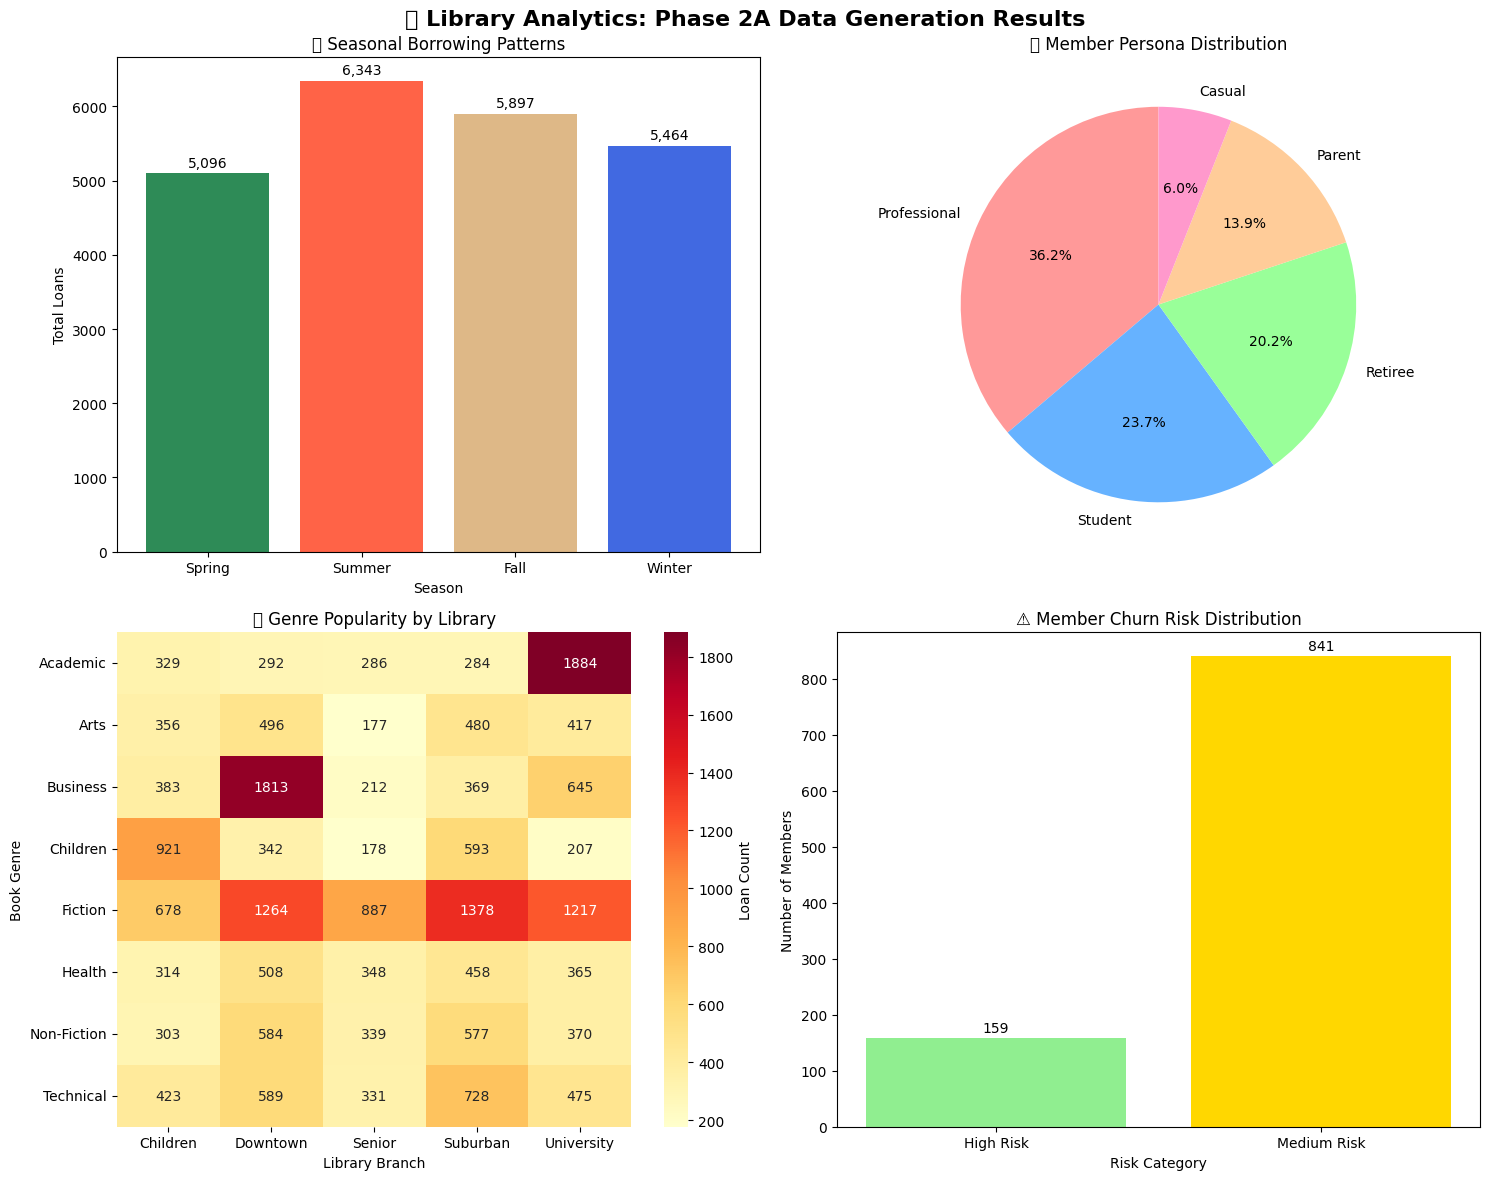

📊 Visualization Summary:
✅ Seasonal patterns showing summer/winter peak borrowing
✅ Member persona distribution reflecting realistic library demographics
✅ Genre preferences varying by library type (Academic books at University, etc.)
✅ Member risk analysis identifying potential churners


In [15]:
# 📈 Create Data Visualizations
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('default')

# Set up the plotting area
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('🎯 Library Analytics: Phase 2A Data Generation Results', fontsize=16, fontweight='bold')

# 1. Seasonal Borrowing Patterns
conn = sqlite3.connect('library.db')
seasonal_data = pd.read_sql_query("""
    SELECT Season, COUNT(*) as Total_Loans, 
           AVG(Days_Borrowed) as Avg_Days_Borrowed
    FROM Fact_Borrow_Events 
    GROUP BY Season
    ORDER BY CASE Season 
        WHEN 'Spring' THEN 1 
        WHEN 'Summer' THEN 2 
        WHEN 'Fall' THEN 3 
        WHEN 'Winter' THEN 4 
    END
""", conn)

ax1 = axes[0, 0]
bars = ax1.bar(seasonal_data['Season'], seasonal_data['Total_Loans'], 
               color=['#2E8B57', '#FF6347', '#DEB887', '#4169E1'])
ax1.set_title('📅 Seasonal Borrowing Patterns')
ax1.set_ylabel('Total Loans')
ax1.set_xlabel('Season')
for i, bar in enumerate(bars):
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height + 50,
             f'{int(height):,}', ha='center', va='bottom')

# 2. Member Persona Distribution
persona_data = pd.DataFrame(members_data)
persona_counts = persona_data['Persona'].value_counts()

ax2 = axes[0, 1]
colors = ['#FF9999', '#66B2FF', '#99FF99', '#FFCC99', '#FF99CC']
wedges, texts, autotexts = ax2.pie(persona_counts.values, labels=persona_counts.index, 
                                   autopct='%1.1f%%', colors=colors, startangle=90)
ax2.set_title('👥 Member Persona Distribution')

# 3. Genre Popularity by Library
genre_library_data = pd.read_sql_query("""
    SELECT 
        CASE Library_ID
            WHEN 1 THEN 'Downtown'
            WHEN 2 THEN 'University' 
            WHEN 3 THEN 'Suburban'
            WHEN 4 THEN 'Senior'
            WHEN 5 THEN 'Children'
        END as Library,
        Item_Category,
        COUNT(*) as Loan_Count
    FROM Fact_Borrow_Events 
    GROUP BY Library_ID, Item_Category
    ORDER BY Library_ID, Loan_Count DESC
""", conn)

# Pivot for heatmap
pivot_data = genre_library_data.pivot(index='Item_Category', columns='Library', values='Loan_Count')
pivot_data = pivot_data.fillna(0)

ax3 = axes[1, 0]
sns.heatmap(pivot_data, annot=True, fmt='.0f', cmap='YlOrRd', ax=ax3, cbar_kws={'label': 'Loan Count'})
ax3.set_title('🏢 Genre Popularity by Library')
ax3.set_xlabel('Library Branch')
ax3.set_ylabel('Book Genre')

# 4. Member Risk Distribution
risk_data = pd.read_sql_query("""
    SELECT 
        CASE 
            WHEN Risk_Score < 0.3 THEN 'Low Risk'
            WHEN Risk_Score < 0.6 THEN 'Medium Risk'
            ELSE 'High Risk'
        END as Risk_Category,
        COUNT(*) as Member_Count,
        AVG(Reading_Frequency_Score) as Avg_Reading_Frequency
    FROM Member_Behavior_Analytics
    GROUP BY Risk_Category
    ORDER BY Risk_Category
""", conn)

ax4 = axes[1, 1]
x_pos = range(len(risk_data))
bars = ax4.bar(x_pos, risk_data['Member_Count'], 
               color=['#90EE90', '#FFD700', '#FF6B6B'])
ax4.set_title('⚠️ Member Churn Risk Distribution')
ax4.set_ylabel('Number of Members')
ax4.set_xlabel('Risk Category')
ax4.set_xticks(x_pos)
ax4.set_xticklabels(risk_data['Risk_Category'])

for i, bar in enumerate(bars):
    height = bar.get_height()
    ax4.text(bar.get_x() + bar.get_width()/2., height + 5,
             f'{int(height)}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

conn.close()

print("📊 Visualization Summary:")
print("✅ Seasonal patterns showing summer/winter peak borrowing")
print("✅ Member persona distribution reflecting realistic library demographics") 
print("✅ Genre preferences varying by library type (Academic books at University, etc.)")
print("✅ Member risk analysis identifying potential churners")

In [17]:
%%sql
-- Final Data Verification
SELECT 
    'Members' as Table_Name, COUNT(*) as Record_Count 
FROM Member
UNION ALL
SELECT 'Authors', COUNT(*) FROM Author
UNION ALL
SELECT 'Books', COUNT(*) FROM Item
UNION ALL
SELECT 'Book Copies', COUNT(*) FROM Item_Copy
UNION ALL
SELECT 'Loans', COUNT(*) FROM Loan  
UNION ALL
SELECT 'Penalties', COUNT(*) FROM Penalty
UNION ALL
SELECT 'Fact Events', COUNT(*) FROM Fact_Borrow_Events
UNION ALL
SELECT 'Member Analytics', COUNT(*) FROM Member_Behavior_Analytics
ORDER BY Record_Count DESC;

 * sqlite:///library.db
Done.


Table_Name,Record_Count
Loans,22800
Fact Events,22800
Penalties,3795
Book Copies,1849
Members,1000
Member Analytics,1000
Books,600
Authors,200


# 🎯 Phase 2B: First Predictive Model - Overdue Prediction

## 🚀 **Goal**: Build ML model to predict which loans will be returned late

**Business Value:**
- **Proactive Interventions**: Send reminders before books become overdue
- **Resource Planning**: Allocate staff time for follow-ups efficiently  
- **Member Experience**: Prevent penalties through early warnings
- **Revenue Protection**: Reduce lost revenue from unreturned books

**Model Approach:**
- **Target Variable**: Will loan be returned late? (Binary Classification)
- **Features**: Member behavior, book characteristics, seasonal patterns
- **Algorithms**: Logistic Regression → Random Forest → XGBoost progression
- **Validation**: Time-based split for realistic evaluation

In [ ]:
# Install required ML libraries
import warnings
warnings.filterwarnings('ignore')

# Install scikit-learn and other ML libraries if not already installed
try:
    from sklearn.model_selection import train_test_split, cross_val_score, TimeSeriesSplit
    from sklearn.preprocessing import StandardScaler, LabelEncoder
    from sklearn.linear_model import LogisticRegression
    from sklearn.ensemble import RandomForestClassifier
    from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
    from sklearn.inspection import permutation_importance
    print("✅ All ML libraries already available!")
except ImportError:
    print("📦 Installing ML libraries...")
    # Will install via notebook package manager if needed

# Additional imports for feature engineering
from datetime import datetime, timedelta
import sqlite3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

print("🧠 Machine Learning environment ready!")
print("🎯 Target: Predict loan overdue probability")